<a href="https://colab.research.google.com/github/shahlafakouri/ShahlaFakouri2023/blob/main/CNNshahla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading data file
df = pd.read_csv('/content/drive/MyDrive/data/WELFake_Dataset.csv')


In [ ]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Defining column titles

df.columns = ["id","title","text","label"]

In [ ]:
df.head(10)

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Preprocessing and Feature Extraction Phase

In [ ]:
# remove unwanted column entries (id and title)

df.drop(labels=['id','title'], axis='columns', inplace=True)


In [ ]:
df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

In [ ]:
#Removing null values from text

df.dropna(subset = ["text"], inplace=True)


In [ ]:
import torch
from torchtext.data.utils import get_tokenizer

# Load the stopword list
stopwords = set(['list', 'of', 'stop', 'words'])

# Create a tokenizer
tokenizer = get_tokenizer('basic_english')

# Define a function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

# Tokenize the text using the tokenizer function
df['text'] = df['text'].apply(lambda x: tokenizer(x))

# Remove stopwords from the tokenized text
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

# Convert the tokenized text to tensors
df['text'] = df['text'].apply(lambda x: torch.tensor(x))

# Split the data into train, validation, and test sets
# ...


In [ ]:
# Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [ ]:
# Case folding.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d', ' ')

<ipython-input-14-196c781e8b9f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d', ' ')


In [ ]:
# assign text samples and their labels and print no of rows in 'texts'

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 72095 texts.


In [ ]:
# Fill NaN values with "" in the texts column

texts = texts.fillna("")

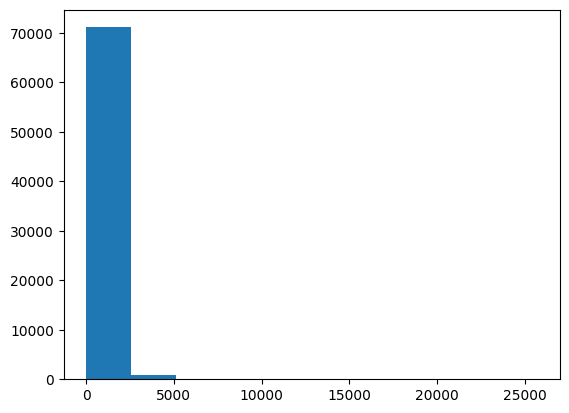

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

count    72095.000000
mean       573.123587
std        658.428156
min          1.000000
25%        243.000000
50%        424.000000
75%        710.000000
max      25708.000000
Name: text, dtype: float64

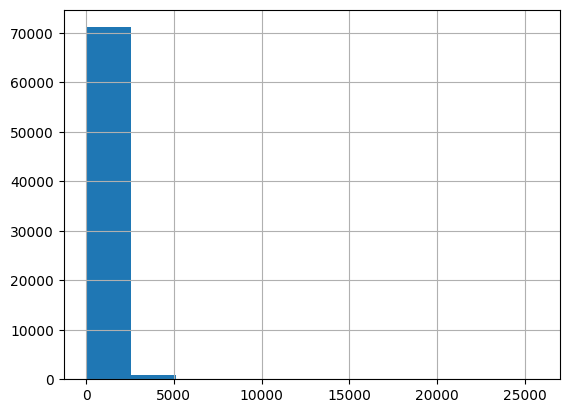

In [ ]:
pd.Series(text_lengths).hist()
pd.Series(text_lengths).describe()

In [ ]:
MAX_SEQUENCE_LENGTH = 700 # shahla: default 700
MAX_NUM_WORDS = 1000 # shahla: default 1000
EMBEDDING_DIM = 512 # shahla
TEST_SPLIT = 0.2

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.tokenize import WordPunctTokenizer

# Tokenizing sentences into words
tokenizer = WordPunctTokenizer()
# Splitting each text into tokens
tokens = texts.apply(tokenizer.tokenize)
# Converting tokens back to text
texts = tokens.apply(' '.join)


In [ ]:
# shahla add this code as new biagram tokenizer
# Install and import the required libraries
!pip install torch torchvision
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Define the tokenizer function for trigram tokenization
def tokenize_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    tokens = text.split()
    ngrams = zip(tokens, tokens[1:], tokens[2:])
    return [" ".join(ngram) for ngram in ngrams]

# Tokenize the text using the tokenizer function
df['text'] = df['text'].apply(lambda x: tokenize_text(x))

# Split the data into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], labels, test_size=0.2)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1)

# Convert the texts and labels into tensors
train_data = list(zip(train_texts, train_labels))
val_data = list(zip(val_texts, val_labels))
test_data = list(zip(test_texts, test_labels))

# Define a custom dataset
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer, word_index):
        self.data = data
        self.tokenizer = tokenizer
        self.word_index = word_index
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text, label = self.data[idx]
        tokens = self.tokenizer(text)
        sequence = [self.word_index.get(token, 0) for token in tokens]
        return torch.LongTensor(sequence), torch.Tensor([label])
        
# Define the tokenizer function for converting texts to sequences of integers
def tokenizer(text):
    # Implement your trigram tokenizer logic here
    tokens = text.split()
    ngrams = zip(tokens, tokens[1:], tokens[2:])
    return [" ".join(ngram) for ngram in ngrams]

# Rest of your code (model definition, training loop, etc.) goes here
# ...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


# tokenizing sentences into words 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# using fit_on_texts method assigning values to particular words
tokenizer.fit_on_texts(texts)
# texts_to_sequences method is used to give particular integer values to word
sequences = tokenizer.texts_to_sequences(texts)

# calculating word_index
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
# padding data to the same length for each samples
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 234143 unique tokens.
Shape of data tensor: (72095, 700)
Shape of label tensor: (72095,)


# Data Curation Phase

In [ ]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, labels, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)



In [ ]:
data.shape

(72095, 700)

In [ ]:
x_train.shape

(51908, 700)

In [ ]:
x_val.shape

(5768, 700)

In [ ]:
x_test.shape

(14419, 700)

# Model Building Phase

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# building convolutional neural network model                                                                      
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import BatchNormalization, GlobalAveragePooling1D, LSTM, Dense, Input, Flatten, Activation, Multiply
from sklearn.model_selection import RandomizedSearchCV # shahla: added
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score # shahla: added
from keras.wrappers.scikit_learn import KerasClassifier # shahla: added
#from scikeras.wrappers import KerasClassifier, KerasRegressor # shahla: added
from keras.models import Model

def my_model(EMBEDDING_DIM, filter1, filter2, filter3, filter4, kernel1, kernel2, kernel3, kernel4, dropout1, dropout2, activation, unit1, unit2, optimizer):
  #dropout1 = 0.4 # shahla: default is 0.4
  #dropout2 = 0.5 # shahla: default is 0.5
  num_classes = 1
  model = Sequential(
      [
          # part 1: word and sequence processing
     
          # defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 600. Where num_words are unique words.
          layers.Embedding(242766,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False),
     
          # for defining convolutional layer, number of filters are set as 64 and kernal size is defined as 1 X 9.
          layers.Conv1D(filters=filter1, kernel_size=kernel1, activation='ReLU'), # shahla: default is 64, 9
          # maxpooling1d layer is used to take maximum values from representation.
          layers.MaxPooling1D(2),
          # adding dropout 0.2
          layers.Dropout(dropout1),
     
          # creating second convolutional layer with kernal size 1 X 6, and number of filters will be 32. Where activation function will remain same as ReLU.
          layers.Conv1D(filters=filter2, kernel_size=kernel2, activation='ReLU'),
          # creating maxpooling layer with 2 neurons so that will compare with neighbour neuron and will take max value.
          layers.MaxPooling1D(2, strides= 2),
     
          # adding one more convolutional layer with kernal size 1 X 6, and number of filters will be 16 and setting strides value as 2. Where activation function will be ReLU.
          layers.Conv1D(filters=filter3, kernel_size=kernel3, activation='ReLU',strides= 2), # shahla: default is 64, 6
        
          layers.Conv1D(filters=filter4, kernel_size=kernel4, activation='ReLU',strides= 2), # shahla added this layer
     
          # adding flatten layer
          layers.Flatten(),
        
          # part 2: classification
          # dense layer with 512 neurons and  Relu activation function.
          layers.Dense(units=unit1, activation=activation), # shahla: added this layer: default is 1024, activation='ReLU'
          layers.Dense(units=unit2, activation=activation), # shahla: added this layer: default is 512, activation='ReLU'
          # dropout value
          layers.Dropout(dropout2),
       
          layers.Dense(num_classes, activation='sigmoid'),
      ])
  # compiling the model with loss as categorical_crossentropy because this is multiclass classfication problem.
  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

  return model  

model = KerasClassifier(build_fn=my_model, verbose=0)

param_grid = {
    'EMBEDDING_DIM': [64, 128, 256, 512, 1024],
    'filter1':[32, 64, 128],
    'filter2':[16, 32, 64],
    'filter3':[8, 16, 32],
    'filter4':[8, 16, 32],
    'kernel1':[3,5,9],
    'kernel2':[3,5],
    'kernel3':[3,5],
    'kernel4':[3,5],
    'unit1': [128, 256, 512],
    'unit2': [64, 128, 256],
    'dropout1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'dropout2': [0.1, 0.2, 0.3, 0.4, 0.5],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam','sgd']
    }

scorer = make_scorer(accuracy_score)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=15,
    cv=3,
    verbose=2
    )

random_search.fit(x_train, y_train)

<ipython-input-30-a9840efeba06>:62: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=my_model, verbose=0)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
541/541 [==============================] - 4s 6ms/step
[CV] END EMBEDDING_DIM=512, activation=relu, dropout1=0.4, dropout2=0.2, filter1=128, filter2=32, filter3=32, filter4=32, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=sgd, unit1=256, unit2=256; total time=  49.3s
541/541 [==============================] - 3s 6ms/step
[CV] END EMBEDDING_DIM=512, activation=relu, dropout1=0.4, dropout2=0.2, filter1=128, filter2=32, filter3=32, filter4=32, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=sgd, unit1=256, unit2=256; total time=  24.0s
541/541 [==============================] - 4s 6ms/step
[CV] END EMBEDDING_DIM=512, activation=relu, dropout1=0.4, dropout2=0.2, filter1=128, filter2=32, filter3=32, filter4=32, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=sgd, unit1=256, unit2=256; total time=  21.1s
541/541 [==============================] - 2s 3ms/step
[CV] END EMBEDDING_DIM=512, activation=sigmoid, dropo

In [ ]:
best_model = random_search.best_estimator_
print (best_model)
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

NameError: ignored

In [ ]:
best_embedding_dim = best_params['EMBEDDING_DIM']
best_filter1       = best_params['filter1']
best_filter2       = best_params['filter2']
best_filter3       = best_params['filter3']
best_filter4       = best_params['filter4']
best_kernel1       = best_params['kernel1']
best_kernel2       = best_params['kernel2']
best_kernel3       = best_params['kernel3']
best_kernel4       = best_params['kernel4']
best_dropout1      = best_params['dropout1']
best_dropout2      = best_params['dropout2']
best_activation    = best_params['activation']
best_unit1         = best_params['unit1']
best_unit2         = best_params['unit2']
best_optimizer     = best_params['optimizer']
model = my_model(EMBEDDING_DIM=best_embedding_dim,
                 filter1=best_filter1,
                 filter2=best_filter2,
                 filter3=best_filter3,
                 filter4=best_filter4,
                 kernel1=best_kernel1,
                 kernel2=best_kernel2,
                 kernel3=best_kernel3,
                 kernel4=best_kernel4,
                 dropout1=best_dropout1,
                 dropout2=best_dropout2,
                 activation=best_activation,
                 unit1=best_unit1,
                 unit2=best_unit2,
                 optimizer=best_optimizer)

model.summary()

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

# Model Training Phase

In [ ]:
# train the model with batch size of 16 and 45 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=128, # shahla: 16
                    epochs=30, # shahla: 15
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)

In [ ]:
!pip install keras_flops

In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 16)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing phase

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

# Evaluation Phase

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc

In [ ]:
# Model evaluation
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

# Extention with other datasets

In [ ]:
# loading weights of cyberbullying dataset to perform weights transferred on fake news detection for experimental study.
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/data/WELFake_Dataset.csv')

In [ ]:
loaded_model.summary()

In [ ]:
from keras.layers import Activation, Dense
model_new = Sequential()
# going through until last layer (ommitting last layer as this problem belongs to binary classification)
for layer in loaded_model.layers[:-1]: 
    model_new.add(layer)

# adding final layer with 1 neuron as this is binary classification problem and sigmoid activation function
model_new.add(Dense(1,activation = 'sigmoid'))


# compiling model
model_new.summary()
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])

In [ ]:
# train the model
import time as t
start = t.time()

# fitting data to model where batch size is defined as 128 and epochs set as 15. Also validating model with 10% validation values of dataset.
history = model_new.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))
print("total time in training",t.time()-start)

In [ ]:
# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model_new.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

In [ ]:
# evaluating model after swapping weights from cyberbullying to fake news.
model_new.evaluate(x_test,y_test)